In [1]:
import pandas as pd
from IPython.display import display
import seaborn as sns
import matplotlib.pyplot as plt
from tabulate import tabulate

In [2]:
sacog = pd.read_excel("sacog_recoded_for_qianhua.xlsx")

## Interesting columns
### Behavior related
#### PURCHASE:
##### InStore: # of trips, frequency, # of items, mode, distance
##### ECommerce: # of orders, frequency, # of items
    Channel: callin, mobileApp, Browser
#### RECEIVE:
    Curbside, Instore, Tohome, ToNonHome
    Pickup mode, ease
#### CHANGE: (Since the start of COVID-19)
    # of trips to store: More/Less/No Change
    Ecommerce: More/Less/No Change
#### JanFeb:
    Grocery Frequency
#### Subscription/Membership Length
#### TRIED:
    Neverheard/beforeSIP/SinceSIP

### Psychology related
'KnowAboutSIP',
'PreparedToSIP',
LAST tens columns of attitudinal data
EASE

In [3]:
list(sacog.columns)

['Unnamed: 0',
 'Duration (in seconds)',
 'Response ID',
 'May-WorkingHours',
 'May-TelecommutingDays',
 'May-Trips-Commuting',
 'May-Trips-Medical',
 'May-Trips-Gym',
 'May-Trips-ToSchool',
 'May-Trips-FromSchool',
 'May-Trips-Bar',
 'May-Trips-MovieTheater',
 'May-Trips-Friends',
 'May-Trips-Family',
 'May-Trips-Other',
 'May-Trips-OtherType',
 'CommutingFollowup',
 'May-TripDistance-Commuting',
 'May-TripDistance-Medical',
 'May-TripDistance-Gym',
 'May-TripDistance-ToSchool',
 'May-TripDistance-FromSchool',
 'May-TripDistance-Bar',
 'May-TripDistance-MovieTheater',
 'May-TripDistance-Friends',
 'May-TripDistance-Family',
 'May-TripDistance-Other',
 'May-TripDistance-OtherType',
 'May-TripMode-Commuting',
 'May-TripMode-Medical',
 'May-TripMode-Gym',
 'May-TripMode-ToSchool',
 'May-TripMode-FromSchool',
 'May-TripMode-Bar',
 'May-TripMode-MovieTheater',
 'May-TripMode-Friends',
 'May-TripMode-Family',
 'May-TripMode-Other',
 'May-TripMode-OtherType',
 'LivingInSamePlace',
 'JanFeb-W

In [ ]:
Interest_Columns = [k for k in sacog.columns if (in k) or (in k)]

### Grocery trips and e-commerce purchases

In [5]:
sacog['May-InStore-Trips-Groceries'].describe()

count     327.000000
mean     -272.373089
std      1638.667014
min     -9998.000000
25%         2.000000
50%         2.000000
75%         4.000000
max        11.000000
Name: May-InStore-Trips-Groceries, dtype: float64

In [18]:
len(sacog[sacog['PastYear-ECommerce-Frequency-PreparedFood'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-Groceries'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-OtherFood'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-PaperCleaning'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-Clothing'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-HomeOffice'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-Medication'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-ChildcareItems'] == "Never"]), \
len(sacog[sacog['PastYear-ECommerce-Frequency-Other'] == "Never"])

(87, 130, 147, 96, 24, 60, 78, 185, 55)

### Group 1. Households (almost) did no online shopping in past year (9 in total)

In [129]:
sacog['PastYear-ECommerce-Frequency-PreparedFood'].value_counts()

Never                          87
Less than 1 time per month     56
About 1 time per week          51
Less than 1 time per week      43
Almost never                   36
No Response                    33
2 - 3 times per week           17
3 - 5 times per week            2
More than 5 times per week      2
Name: PastYear-ECommerce-Frequency-PreparedFood, dtype: int64

In [131]:
PastNeverOnline = sacog[(sacog['PastYear-ECommerce-Frequency-PreparedFood'].isin(["Never", "Almost never"])) & 
          (sacog['PastYear-ECommerce-Frequency-Groceries'].isin(["Never", "Almost never"])) & 
          (sacog['PastYear-ECommerce-Frequency-OtherFood'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-PaperCleaning'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Clothing'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-HomeOffice'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Medication'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-ChildcareItems'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Other'].isin(["Never", "Almost never"]))]

In [132]:
PastNeverOnline[['May-InStore-Trips-Groceries', 
                 'May-ECommerce-Orders-Groceries',
                 'Change-Shopping-TripsToStore-Groceries', 
                 'Change-Shopping-ECommercePurchases-Groceries'
                ]]

,May-InStore-Trips-Groceries,May-ECommerce-Orders-Groceries,Change-Shopping-TripsToStore-Groceries,Change-Shopping-ECommercePurchases-Groceries
47,6,-9998,More,No change
71,1,-9998,More,No change
78,4,-9998,Less,No Response
187,4,0,No change,No change
210,10,-9998,Less,No change
257,4,0,No change,No change
263,6,-9998,More,No change
280,2,0,No change,No change
281,4,0,Less,No change


### Change in behavior
#### Among those who never do ecommerce in the past year, during the surveyed week in May, one household had 3 orders of prepared food and 3 orders of post office, one had 1 medication order, one had 2 homeoffice orders and 1(?) automotive order, one have #(?) pet supplies order. 

In [133]:
PastNeverOnline[['May-ECommerce-Orders-PreparedFood', 
                 'May-ECommerce-Orders-Groceries', 
                 'May-ECommerce-Orders-OtherFood',
                 'May-ECommerce-Orders-PaperCleaning',
                 'May-ECommerce-Orders-Clothing',
                 'May-ECommerce-Orders-HomeOffice',
                 'May-ECommerce-Orders-Medication',
                 'May-ECommerce-Orders-ChildcareItems',
                 'May-ECommerce-Orders-Other', 
                 'May-ECommerce-Orders-OtherType',
                 ]]

,May-ECommerce-Orders-PreparedFood,May-ECommerce-Orders-Groceries,May-ECommerce-Orders-OtherFood,May-ECommerce-Orders-PaperCleaning,May-ECommerce-Orders-Clothing,May-ECommerce-Orders-HomeOffice,May-ECommerce-Orders-Medication,May-ECommerce-Orders-ChildcareItems,May-ECommerce-Orders-Other,May-ECommerce-Orders-OtherType,Rewards-COVIDSignup-AmazonPrime,Rewards-COVIDSignup-TargetCircle,Rewards-COVIDSignup-Shoprunner,Rewards-COVIDSignup-RestaurantDelivery,Rewards-COVIDSignup-GroceryDelivery,Rewards-COVIDSignup-Other
47,3,-9998,-9998,-9998,-9998,-9998,-9998,-9998,3,Post office,-9998,-9998,-9998,-9998,-9998,-9998
71,-9998,-9998,-9998,-9998,-9998,-9998,-9998,-9998,0,pet supplies,-9998,-9998,-9998,-9998,-9998,-9998
78,-9998,-9998,-9998,2,2,-9998,-9998,-9998,-9998,NaN,-9998,-9998,-9998,-9998,-9998,-9998
187,-9998,0,0,0,0,0,0,0,0,NaN,-9998,-9998,-9998,-9998,-9998,-9998
210,-9998,-9998,-9998,-9998,-9998,1,-9998,-9998,-9998,NaN,-9998,-9998,-9998,-9998,-9998,-9998
257,0,0,0,0,0,0,1,0,0,NaN,-9998,-9998,-9998,-9998,-9998,-9998
263,-9998,-9998,-9998,-9998,-9998,2,0,0,-9998,Automotive,-9998,-9998,-9998,-9998,-9998,-9998
280,1,0,0,0,0,0,0,0,0,NaN,-9998,-9998,-9998,-9998,-9998,-9998
281,0,0,-9998,0,0,0,0,0,-9998,NaN,-9998,-9998,-9998,-9998,-9998,-9998


### Habit and perceived ease of online shopping
#### No.71 has Amazon membership for 2 to 5 years but perceive online shopping as extremely difficult. All 5 households had neutral or negative perception towards online shopping ease.

In [137]:
PastNeverOnline[['Rewards-COVIDSignup-AmazonPrime',
                 'Rewards-COVIDSignup-TargetCircle',
                 'Rewards-COVIDSignup-Shoprunner',
                 'Rewards-COVIDSignup-RestaurantDelivery',
                 'Rewards-COVIDSignup-GroceryDelivery',
                 'Rewards-COVIDSignup-Other']]

,Rewards-COVIDSignup-AmazonPrime,Rewards-COVIDSignup-TargetCircle,Rewards-COVIDSignup-Shoprunner,Rewards-COVIDSignup-RestaurantDelivery,Rewards-COVIDSignup-GroceryDelivery,Rewards-COVIDSignup-Other
47,-9998,-9998,-9998,-9998,-9998,-9998
71,-9998,-9998,-9998,-9998,-9998,-9998
78,-9998,-9998,-9998,-9998,-9998,-9998
187,-9998,-9998,-9998,-9998,-9998,-9998
210,-9998,-9998,-9998,-9998,-9998,-9998
257,-9998,-9998,-9998,-9998,-9998,-9998
263,-9998,-9998,-9998,-9998,-9998,-9998
280,-9998,-9998,-9998,-9998,-9998,-9998
281,-9998,-9998,-9998,-9998,-9998,-9998


In [138]:
PastNeverOnline[['Rewards-Member-AmazonPrime',
 'Rewards-Member-TargetCircle',
 'Rewards-Member-Shoprunner',
 'Rewards-Member-RestaurantDelivery',
 'Rewards-Member-GroceryDelivery',
 'Rewards-Member-Other',
 'Rewards-Member-OtherType',
 'Rewards-Length-AmazonPrime',
 'Rewards-Length-TargetCircle',
 'Rewards-Length-Shoprunner',
 'Rewards-Length-RestaurantDelivery',
 'Rewards-Length-GroceryDelivery',
 'Rewards-Length-Other',
 'Online-Ease',
 'Online-Ease-Comment']]

,Rewards-Member-AmazonPrime,Rewards-Member-TargetCircle,Rewards-Member-Shoprunner,Rewards-Member-RestaurantDelivery,Rewards-Member-GroceryDelivery,Rewards-Member-Other,Rewards-Member-OtherType,Rewards-Length-AmazonPrime,Rewards-Length-TargetCircle,Rewards-Length-Shoprunner,Rewards-Length-RestaurantDelivery,Rewards-Length-GroceryDelivery,Rewards-Length-Other,Online-Ease,Online-Ease-Comment
47,0,0,0,0,0,0,NaN,No Response,No Response,No Response,No Response,No Response,No Response,3,NaN
71,1,0,0,0,0,0,NaN,Between 2 and 5 years,No Response,No Response,No Response,No Response,No Response,5,NaN
78,1,1,0,0,0,0,NaN,Longer than 5 years,Between 2 and 5 years,No Response,No Response,No Response,No Response,5,NaN
187,1,1,0,0,0,0,NaN,Between 2 and 5 years,Between 1 and 2 years,No Response,No Response,No Response,No Response,5,NaN
210,0,1,0,0,0,1,Rakuten,No Response,Between 1 and 2 years,No Response,No Response,No Response,Between 2 and 5 years,5,It's easy to make the purchase but you never k...
257,0,1,0,0,0,0,NaN,No Response,Between 3 months and 1 year,No Response,No Response,No Response,No Response,4,NaN
263,1,0,0,0,0,0,NaN,Between 2 and 5 years,No Response,No Response,No Response,No Response,No Response,3,I would like to be assure that it is a safe pr...
280,1,1,0,0,0,0,NaN,Between 2 and 5 years,Between 1 and 2 years,No Response,No Response,No Response,No Response,4,NaN
281,0,1,0,0,0,0,NaN,No Response,Between 3 months and 1 year,No Response,No Response,No Response,No Response,3,NaN


In [34]:
PastNeverOnline[['Subscription-Member-Food',
 'Subscription-Member-Clothing',
 'Subscription-Member-PersonalCare',
 'Subscription-Member-HouseholdItems',
 'Subscription-Member-Other',
 'Subscription-Member-OtherType',
 'Subscription-Length-Food',
 'Subscription-Length-Clothing',
 'Subscription-Length-PersonalCare',
 'Subscription-Length-HouseholdItems',
 'Subscription-Length-Other',
 'Subscription-COVIDSignup-Food',
 'Subscription-COVIDSignup-Clothing',
 'Subscription-COVIDSignup-PersonalCare',
 'Subscription-COVIDSignup-HouseholdItems',
 'Subscription-COVIDSignup-Other']]

,Subscription-Member-Food,Subscription-Member-Clothing,Subscription-Member-PersonalCare,Subscription-Member-HouseholdItems,Subscription-Member-Other,Subscription-Member-OtherType,Subscription-Length-Food,Subscription-Length-Clothing,Subscription-Length-PersonalCare,Subscription-Length-HouseholdItems,Subscription-Length-Other,Subscription-COVIDSignup-Food,Subscription-COVIDSignup-Clothing,Subscription-COVIDSignup-PersonalCare,Subscription-COVIDSignup-HouseholdItems,Subscription-COVIDSignup-Other
47,0,0,0,0,0,NaN,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response
71,0,0,0,0,0,NaN,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response
257,0,0,0,0,0,NaN,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response
263,0,0,0,0,1,Avon Distributor,No Response,No Response,No Response,No Response,Longer than 5 years,No Response,No Response,No Response,No Response,No Response
281,0,0,0,0,0,NaN,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response,No Response


In [140]:
display(PastNeverOnline[['Behavior-OnlyList',
 'Behavior-NotMindGroceriesOnline',
 'Behavior-NotMindRestaurantOnline',
 'Behavior-InPersonIsChore',
 'Behavior-GroceryExcuseToGetOut',
 'Behavior-PickupExcuseToGetOut']])
display(PastNeverOnline[['ECommerce-Food-EnvironmentallyFriendly',
 'ECommerce-Food-SupportLocal',
 'ECommerce-Food-SavesTime',
 'ECommerce-Food-SavesMoney',
 'ECommerce-Food-HardToKnowExactly',
 'ECommerce-Food-WorryAboutTheft',
 'ECommerce-Food-AvoidCarrying',
 'ECommerce-Food-InstantIsCool',
 'ECommerce-Food-OtherThought',
 'ECommerce-Food-OtherThoughtType']])
display(PastNeverOnline[['NonFood-OnlineRelaxing',
 'NonFood-EnjoyOnlineClothing',
 'NonFood-EnjoyOnlineElectronice',
 'NonFood-SearchForBestDeals',
 'NonFood-EnjoyBrowsingWOBuying',
 'NonFood-InPersonClothingChore',
 'NonFood-RetailExcuseToGetOut']])
display(PastNeverOnline[['ECommerce-NonFood-EnvironmentallyFriendly',
 'ECommerce-NonFood-SupportLocal',
 'ECommerce-NonFood-SavesTime',
 'ECommerce-NonFood-SavesMoney',
 'ECommerce-NonFood-HardToKnowExactly',
 'ECommerce-NonFood-WorryAboutTheft',
 'ECommerce-NonFood-CloseAttnToReviews',
 'ECommerce-NonFood-ComparingEasy',
 'ECommerce-NonFood-InstantIsCool',
 'ECommerce-NonFood-OtherThought',
 'ECommerce-NonFood-OtherThoughtType']])
display(PastNeverOnline[['ECommerce-NonFood-EnvironmentallyFriendly',
 'ECommerce-NonFood-SupportLocal',
 'ECommerce-NonFood-SavesTime',
 'ECommerce-NonFood-SavesMoney',
 'ECommerce-NonFood-HardToKnowExactly',
 'ECommerce-NonFood-WorryAboutTheft',
 'ECommerce-NonFood-CloseAttnToReviews',
 'ECommerce-NonFood-ComparingEasy',
 'ECommerce-NonFood-InstantIsCool',
 'ECommerce-NonFood-OtherThought',
 'ECommerce-NonFood-OtherThoughtType']])
display(PastNeverOnline[[
    'Attitude-SatisfiedWithLife',
 'Attitude-ZoomFatigue',
 'Attitude-SociallyIsolated',
 'Attitude-Stressed',
 'Attitude-HaveEnoughTime',
 'Attitude-HaveEnoughFood',
 'Attitude-HaveEnoughMeds',
 'Attitude-WorryBasicNeeeds',
]])

,Behavior-OnlyList,Behavior-NotMindGroceriesOnline,Behavior-NotMindRestaurantOnline,Behavior-InPersonIsChore,Behavior-GroceryExcuseToGetOut,Behavior-PickupExcuseToGetOut
47,3,3,3,4,2,3
71,3,2,3,2,3,2
78,2,2,2,2,2,2
187,3,4,4,2,4,2
210,4,1,2,2,1,1
257,2,3,3,2,3,2
263,5,5,5,3,1,1
280,4,1,4,2,4,4
281,2,4,4,2,5,2


,ECommerce-Food-EnvironmentallyFriendly,ECommerce-Food-SupportLocal,ECommerce-Food-SavesTime,ECommerce-Food-SavesMoney,ECommerce-Food-HardToKnowExactly,ECommerce-Food-WorryAboutTheft,ECommerce-Food-AvoidCarrying,ECommerce-Food-InstantIsCool,ECommerce-Food-OtherThought,ECommerce-Food-OtherThoughtType
47,3,3,3,3,3,3,3,3,-9998,NaN
71,3,3,3,3,4,3,3,3,3,NaN
78,3,3,3,2,5,2,2,2,-9998,NaN
187,2,4,3,2,2,4,3,2,3,NaN
210,3,4,3,2,5,4,1,2,-9998,NaN
257,2,4,2,2,4,2,1,2,-9998,NaN
263,3,4,4,5,4,5,4,4,-9998,NaN
280,2,4,4,2,4,4,2,4,-9998,NaN
281,4,5,4,5,4,4,3,3,-9998,NaN


,NonFood-OnlineRelaxing,NonFood-EnjoyOnlineClothing,NonFood-EnjoyOnlineElectronice,NonFood-SearchForBestDeals,NonFood-EnjoyBrowsingWOBuying,NonFood-InPersonClothingChore,NonFood-RetailExcuseToGetOut
47,4,4,4,4,4,4,3
71,3,3,4,5,2,2,3
78,4,4,4,4,4,2,2
187,2,3,2,3,4,2,4
210,3,2,4,4,4,1,3
257,4,1,4,4,4,3,4
263,2,3,3,5,5,3,1
280,4,2,1,1,4,2,4
281,3,4,2,4,5,2,4


,ECommerce-NonFood-EnvironmentallyFriendly,ECommerce-NonFood-SupportLocal,ECommerce-NonFood-SavesTime,ECommerce-NonFood-SavesMoney,ECommerce-NonFood-HardToKnowExactly,ECommerce-NonFood-WorryAboutTheft,ECommerce-NonFood-CloseAttnToReviews,ECommerce-NonFood-ComparingEasy,ECommerce-NonFood-InstantIsCool,ECommerce-NonFood-OtherThought,ECommerce-NonFood-OtherThoughtType
47,3,4,4,4,3,4,3,3,3,-9998,NaN
71,3,2,3,4,4,2,5,4,4,-9998,NaN
78,4,3,4,4,4,3,4,3,1,-9998,NaN
187,2,2,4,3,3,4,4,4,3,3,NaN
210,4,3,4,2,2,5,4,2,3,-9998,NaN
257,3,2,4,4,2,2,4,4,2,-9998,NaN
263,4,4,4,2,4,4,3,3,3,-9998,NaN
280,2,2,4,4,4,2,5,4,4,-9998,NaN
281,4,5,4,5,5,4,4,4,2,-9998,NaN


,ECommerce-NonFood-EnvironmentallyFriendly,ECommerce-NonFood-SupportLocal,ECommerce-NonFood-SavesTime,ECommerce-NonFood-SavesMoney,ECommerce-NonFood-HardToKnowExactly,ECommerce-NonFood-WorryAboutTheft,ECommerce-NonFood-CloseAttnToReviews,ECommerce-NonFood-ComparingEasy,ECommerce-NonFood-InstantIsCool,ECommerce-NonFood-OtherThought,ECommerce-NonFood-OtherThoughtType
47,3,4,4,4,3,4,3,3,3,-9998,NaN
71,3,2,3,4,4,2,5,4,4,-9998,NaN
78,4,3,4,4,4,3,4,3,1,-9998,NaN
187,2,2,4,3,3,4,4,4,3,3,NaN
210,4,3,4,2,2,5,4,2,3,-9998,NaN
257,3,2,4,4,2,2,4,4,2,-9998,NaN
263,4,4,4,2,4,4,3,3,3,-9998,NaN
280,2,2,4,4,4,2,5,4,4,-9998,NaN
281,4,5,4,5,5,4,4,4,2,-9998,NaN


,Attitude-SatisfiedWithLife,Attitude-ZoomFatigue,Attitude-SociallyIsolated,Attitude-Stressed,Attitude-HaveEnoughTime,Attitude-HaveEnoughFood,Attitude-HaveEnoughMeds,Attitude-WorryBasicNeeeds
47,4,3,3,3,3,3,3,4
71,4,3,4,4,3,4,4,5
78,4,4,4,2,4,4,4,2
187,4,3,3,2,4,4,4,2
210,4,3,2,4,2,5,5,1
257,2,4,2,4,4,5,5,1
263,5,2,2,1,3,5,3,1
280,4,4,4,4,3,5,5,1
281,4,3,2,2,4,4,4,2


In [175]:
sacog[(~sacog['PastYear-ECommerce-Frequency-PreparedFood'].isin(["Never", "Almost never", "No Response"])) & 
          (~sacog['PastYear-ECommerce-Frequency-Groceries'].isin(["Never", "Almost never", "No Response"])) & 
          (sacog['PastYear-ECommerce-Frequency-OtherFood'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-PaperCleaning'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Clothing'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-HomeOffice'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Medication'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-ChildcareItems'].isin(["Never", "Almost never"])) &
          (sacog['PastYear-ECommerce-Frequency-Other'].isin(["Never", "Almost never"]))]['PastYear-ECommerce-Frequency-OtherType']

186    NaN
Name: PastYear-ECommerce-Frequency-OtherType, dtype: object

In [185]:
sacog['PastYear-ECommerce-Frequency-Other'].value_counts()

No Response                    207
Never                           55
Less than 1 time per month      32
Almost never                    13
Less than 1 time per week       12
About 1 time per week            7
2 - 3 times per week             1
Name: PastYear-ECommerce-Frequency-Other, dtype: int64

### Group 2. Households did no online Grocery shopping last year
130 households never do Egrocery last year. 101 responses. 83 maintain(?) their habit and still did not do eGrocery in that survey week in May (Be careful about their shopping frequency though, 7 households also did not do in-store shopping). 18 adopted eGrocery, among which 4 didn't do in-store Grocery shopping during survey week (Are they changing from in-store only to online only?)

!!! Be careful of how we define old user here (almost never not included)

In [147]:
PastNeverEGrocery = sacog[sacog['PastYear-ECommerce-Frequency-Groceries'].isin(["Never", "Almost never"])]
oldUser = sacog[~sacog['PastYear-ECommerce-Frequency-Groceries'].isin(["Never", "Almost never", "No Response"])]
NonAdopterEGro = PastNeverEGrocery[PastNeverEGrocery['May-ECommerce-Orders-Groceries']==0]
#NonAdopterEGro[NonAdopterEGro['May-InStore-Trips-Groceries']==0]
AdopterEGro = PastNeverEGrocery[PastNeverEGrocery['May-ECommerce-Orders-Groceries'] > 0]
len(PastNeverEGrocery), \
len(NonAdopterEGro), \
len(AdopterEGro), \
len(oldUser), \

(196, 124, 33, 96)

In [225]:
len(sacog[sacog['PastYear-ECommerce-Frequency-Other'].isin(["Never", "Almost never"])]), \
len(sacog[(sacog['PastYear-ECommerce-Frequency-Other'].isin(["Never", "Almost never"])) & (~sacog['May-ECommerce-Frequency-Other'].isin(["Never ", "Almost never", 'No Response']))]), \
len(sacog[(sacog['PastYear-ECommerce-Frequency-Other'].isin(["Never", "Almost never"])) & (sacog['May-ECommerce-Frequency-Other'].isin(["Never ", "Almost never"]))]), \

NonAdopterEGro['May-ECommerce-Frequency-Groceries'].value_counts()

Never                          69
Almost never                   34
Less than 1 time per month     10
Less than 1 time per week       5
No Response                     2
About 1 time per week           2
2 - 3 times per week            2
Name: May-ECommerce-Frequency-Groceries, dtype: int64

### Adopters: either did online purchase during the surveyed week (5/17-5/23) or indicated their performed such online purchasing for certain category with certain frequency at present

### 1) Look into the opposite also. The abandon behavior
### 2) Ease of obtaining items (Perception)

In [7]:
never = ["Never", "Almost never"]
never_and_noRes = ["Never ", "Almost never", 'No Response']

def count_adopter(cat):
    past_year_freq = 'PastYear-ECommerce-Frequency-' + cat
    may_freq = 'May-ECommerce-Frequency-' + cat
    may_order = 'May-ECommerce-Orders-' + cat
    return [len(sacog[~sacog[past_year_freq].isin(never+['No Response'])]),
           len(sacog[sacog[past_year_freq].isin(never)]), 
           len(sacog[(sacog[past_year_freq].isin(never)) & (sacog[may_order] > 0)]) + len(sacog[(sacog[past_year_freq].isin(never)) & (sacog[may_order] == 0) & (~sacog[may_freq].isin(never_and_noRes))]),
           len(sacog[(sacog[past_year_freq].isin(never)) & (sacog[may_order] == 0) & (sacog[may_freq].isin(never))]),
           ]

dict_ = {}
cat_ = ['PreparedFood', 'Groceries', 'OtherFood', 'PaperCleaning', 'Clothing', 'HomeOffice', 'Medication', 'ChildcareItems', 'Other']
for cat in cat_:
    dict_[cat] = count_adopter(cat)
print(tabulate([[cat, dict_[cat][0], 
                 dict_[cat][1], 
                 "{:.1%}".format(dict_[cat][0]/(327)), 
                 dict_[cat][2], 
                 dict_[cat][3],
                 "{:.1%}".format(dict_[cat][2]/dict_[cat][1])] for cat in cat_], headers=['Category', 'Old User(19/20)', 'Never Used(19/20)', 'Penetration(19/20)', 'Adopter', 'NonAdopter', 'Adoption']))
    


Category          Old User(19/20)    Never Used(19/20)  Penetration(19/20)      Adopter    NonAdopter  Adoption
--------------  -----------------  -------------------  --------------------  ---------  ------------  ----------
PreparedFood                  171                  123  52.3%                        49            15  39.8%
Groceries                      96                  196  29.4%                        52            34  26.5%
OtherFood                      83                  207  25.4%                        26            41  12.6%
PaperCleaning                 120                  166  36.7%                        42            25  25.3%
Clothing                      225                   62  68.8%                        15            19  24.2%
HomeOffice                    139                  146  42.5%                        26            47  17.8%
Medication                    154                  129  47.1%                        18            29  14.0%
ChildcareIt

In [21]:
NonAdopterEGro = PastNeverEGrocery[PastNeverEGrocery['May-ECommerce-Orders-Groceries']==0]
#NonAdopterEGro[NonAdopterEGro['May-InStore-Trips-Groceries']==0]
AdopterEGro = PastNeverEGrocery[PastNeverEGrocery['May-ECommerce-Orders-Groceries'] > 0]

In [78]:
AdopterEGro[['May-InStore-Trips-Groceries',
             'May-ECommerce-Orders-Groceries',
             'Change-Shopping-ECommercePurchases-Groceries',
             'Change-Shopping-TripsToStore-Groceries',
             'JanFeb-Grocery-Frequency',]].head(3)

,May-InStore-Trips-Groceries,May-ECommerce-Orders-Groceries,Change-Shopping-ECommercePurchases-Groceries,Change-Shopping-TripsToStore-Groceries,JanFeb-Grocery-Frequency
12,4,2,More,More,More than 5 times per week
13,2,1,More,Less,3 - 5 times per week
16,6,2,More,Less,More than 5 times per week


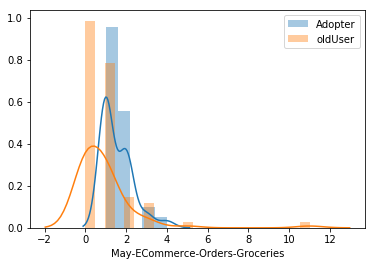

In [148]:
sns.distplot(AdopterEGro[~AdopterEGro['May-ECommerce-Orders-Groceries'].isin([-9998])]['May-ECommerce-Orders-Groceries'], label="Adopter")
sns.distplot(oldUser[~oldUser['May-ECommerce-Orders-Groceries'].isin([-9998])]['May-ECommerce-Orders-Groceries'], label="oldUser")
plt.legend()

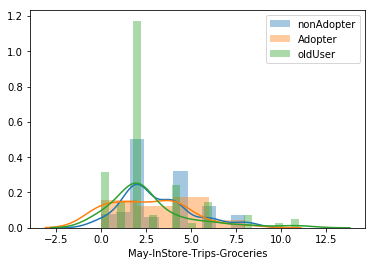

In [149]:
sns.distplot(NonAdopterEGro[~NonAdopterEGro['May-InStore-Trips-Groceries'].isin([-9998])]['May-InStore-Trips-Groceries'], label="nonAdopter")
sns.distplot(AdopterEGro[~AdopterEGro['May-InStore-Trips-Groceries'].isin([-9998])]['May-InStore-Trips-Groceries'], label="Adopter")
sns.distplot(oldUser[~oldUser['May-InStore-Trips-Groceries'].isin([-9998])]['May-InStore-Trips-Groceries'], label="oldUser")
plt.legend()

### Constraints/Attitudes/Perceptions

count    123.000000
mean       4.105691
std        0.837766
min        1.000000
25%        4.000000
50%        4.000000
75%        5.000000
max        5.000000
Name: Online-Ease, dtype: float64

count    33.000000
mean      4.212121
std       0.649883
min       3.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Online-Ease, dtype: float64

count    96.000000
mean      4.343750
std       0.722978
min       1.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: Online-Ease, dtype: float64

35     5
70     4
111    5
117    4
160    5
176    5
232    4
313    4
Name: Online-Ease, dtype: int64

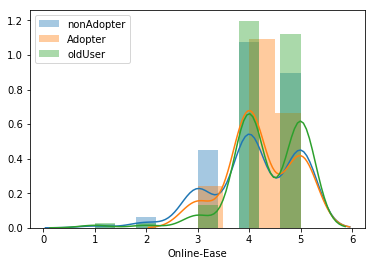

In [150]:
## Be careful here, not a EGro adopter doesn't mean they don't do online shopping on other categories
display(NonAdopterEGro[~NonAdopterEGro['Online-Ease'].isin([997])]['Online-Ease'].describe())
display(AdopterEGro[~AdopterEGro['Online-Ease'].isin([997])]['Online-Ease'].describe())
display(oldUser[~oldUser['Online-Ease'].isin([997])]['Online-Ease'].describe())
sns.distplot(NonAdopterEGro[~NonAdopterEGro['Online-Ease'].isin([997])]['Online-Ease'], label="nonAdopter")
sns.distplot(AdopterEGro[~AdopterEGro['Online-Ease'].isin([997])]['Online-Ease'], label="Adopter")
sns.distplot(oldUser[~oldUser['Online-Ease'].isin([997])]['Online-Ease'], label="oldUser")
plt.legend()
display(AdopterEGro[AdopterEGro['May-InStore-Trips-Groceries']==0]['Online-Ease'])

count    124.000000
mean       2.500000
std        1.179086
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: Behavior-NotMindGroceriesOnline, dtype: float64

count    33.000000
mean      3.606061
std       1.170988
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Behavior-NotMindGroceriesOnline, dtype: float64

35     5
70     4
111    5
117    4
160    4
176    5
232    2
313    4
Name: Behavior-NotMindGroceriesOnline, dtype: int64

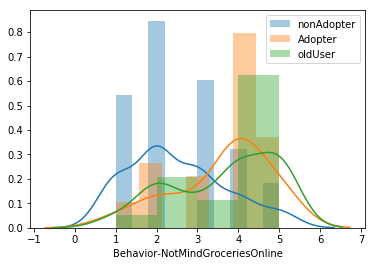

In [151]:
display(NonAdopterEGro['Behavior-NotMindGroceriesOnline'].describe())
display(AdopterEGro['Behavior-NotMindGroceriesOnline'].describe())
sns.distplot(NonAdopterEGro['Behavior-NotMindGroceriesOnline'], label="nonAdopter")
sns.distplot(AdopterEGro['Behavior-NotMindGroceriesOnline'], label = "Adopter")
sns.distplot(oldUser['Behavior-NotMindGroceriesOnline'], label = "oldUser")
plt.legend()
display(AdopterEGro[AdopterEGro['May-InStore-Trips-Groceries']==0]['Behavior-NotMindGroceriesOnline'])

count    124.000000
mean       2.637097
std        1.114098
min        1.000000
25%        2.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: Behavior-InPersonIsChore, dtype: float64

count    33.000000
mean      2.939394
std       1.344884
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Behavior-InPersonIsChore, dtype: float64

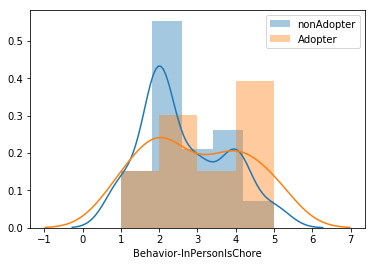

In [152]:
display(NonAdopterEGro['Behavior-InPersonIsChore'].describe())
display(AdopterEGro['Behavior-InPersonIsChore'].describe())
sns.distplot(NonAdopterEGro['Behavior-InPersonIsChore'], label="nonAdopter")
sns.distplot(AdopterEGro['Behavior-InPersonIsChore'], label = "Adopter")
plt.legend()

count    124.000000
mean       3.153226
std        1.140848
min        1.000000
25%        2.000000
50%        3.000000
75%        4.000000
max        5.000000
Name: Behavior-GroceryExcuseToGetOut, dtype: float64

count    33.000000
mean      3.515152
std       1.349102
min       1.000000
25%       3.000000
50%       4.000000
75%       4.000000
max       5.000000
Name: Behavior-GroceryExcuseToGetOut, dtype: float64

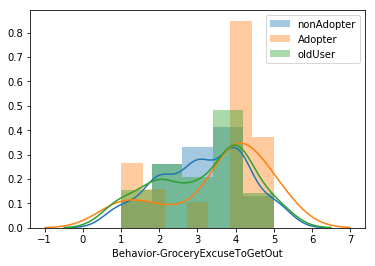

In [159]:
display(NonAdopterEGro['Behavior-GroceryExcuseToGetOut'].describe())
display(AdopterEGro['Behavior-GroceryExcuseToGetOut'].describe())
sns.distplot(NonAdopterEGro['Behavior-GroceryExcuseToGetOut'], label="nonAdopter")
sns.distplot(AdopterEGro['Behavior-GroceryExcuseToGetOut'], label = "Adopter")
sns.distplot(oldUser[~oldUser['Behavior-GroceryExcuseToGetOut'].isin([-9998])]['Behavior-GroceryExcuseToGetOut'], label = "oldUser")
plt.legend()

count    124.000000
mean       3.483871
std        0.914951
min        1.000000
25%        3.000000
50%        4.000000
75%        4.000000
max        5.000000
Name: ECommerce-Food-SavesTime, dtype: float64

count    33.000000
mean      3.848485
std       1.003781
min       1.000000
25%       3.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: ECommerce-Food-SavesTime, dtype: float64

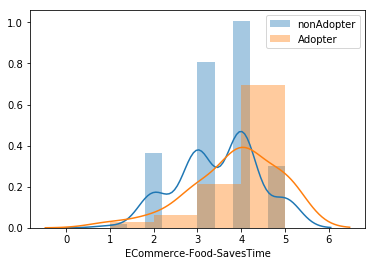

In [154]:
display(NonAdopterEGro['ECommerce-Food-SavesTime'].describe())
display(AdopterEGro['ECommerce-Food-SavesTime'].describe())
sns.distplot(NonAdopterEGro['ECommerce-Food-SavesTime'], label="nonAdopter")
sns.distplot(AdopterEGro['ECommerce-Food-SavesTime'], label = "Adopter")
plt.legend()

count    124.000000
mean       2.290323
std        0.917528
min        1.000000
25%        2.000000
50%        2.000000
75%        3.000000
max        5.000000
Name: ECommerce-Food-SavesMoney, dtype: float64

count    33.000000
mean      2.272727
std       1.068665
min       1.000000
25%       2.000000
50%       2.000000
75%       3.000000
max       5.000000
Name: ECommerce-Food-SavesMoney, dtype: float64

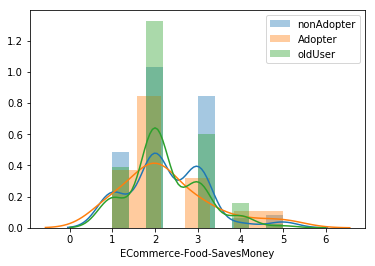

In [157]:
display(NonAdopterEGro['ECommerce-Food-SavesMoney'].describe())
display(AdopterEGro['ECommerce-Food-SavesMoney'].describe())
sns.distplot(NonAdopterEGro['ECommerce-Food-SavesMoney'], label="nonAdopter")
sns.distplot(AdopterEGro['ECommerce-Food-SavesMoney'], label = "Adopter")
sns.distplot(oldUser['ECommerce-Food-SavesMoney'], label = "oldUser")
plt.legend()

count    124.000000
mean       3.903226
std        0.868784
min        1.000000
25%        3.000000
50%        4.000000
75%        4.250000
max        5.000000
Name: ECommerce-Food-HardToKnowExactly, dtype: float64

count    33.000000
mean      4.181818
std       0.768706
min       2.000000
25%       4.000000
50%       4.000000
75%       5.000000
max       5.000000
Name: ECommerce-Food-HardToKnowExactly, dtype: float64

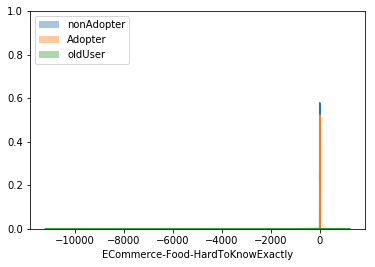

In [158]:
display(NonAdopterEGro['ECommerce-Food-HardToKnowExactly'].describe())
display(AdopterEGro['ECommerce-Food-HardToKnowExactly'].describe())
sns.distplot(NonAdopterEGro['ECommerce-Food-HardToKnowExactly'], label="nonAdopter")
sns.distplot(AdopterEGro['ECommerce-Food-HardToKnowExactly'], label = "Adopter")
sns.distplot(oldUser['ECommerce-Food-HardToKnowExactly'], label = "oldUser")
plt.legend()

count    83.000000
mean      2.915663
std       1.117541
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: ECommerce-Food-WorryAboutTheft, dtype: float64

count    18.000000
mean      2.333333
std       1.283378
min       1.000000
25%       1.250000
50%       2.000000
75%       3.000000
max       5.000000
Name: ECommerce-Food-WorryAboutTheft, dtype: float64

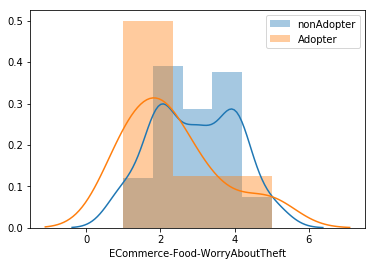

In [62]:
display(NonAdopterEGro['ECommerce-Food-WorryAboutTheft'].describe())
display(AdopterEGro['ECommerce-Food-WorryAboutTheft'].describe())
sns.distplot(NonAdopterEGro['ECommerce-Food-WorryAboutTheft'], label="nonAdopter")
sns.distplot(AdopterEGro['ECommerce-Food-WorryAboutTheft'], label = "Adopter")
plt.legend()

### Adopters have more negative attitudes than nonAdopters, the reason they adopt might be due to the inconvenience of pandemic rather than holding a positive view towards EGro. As constriants lift, they might revert to their previous "never" online grocery shopping habit.

In [64]:
display(NonAdopterEGro['Attitude-SociallyIsolated'].describe())
display(AdopterEGro['Attitude-SociallyIsolated'].describe())

display(NonAdopterEGro['Attitude-Stressed'].describe())
display(AdopterEGro['Attitude-Stressed'].describe())

display(NonAdopterEGro['Attitude-HaveEnoughFood'].describe())
display(AdopterEGro['Attitude-HaveEnoughFood'].describe())

count    83.000000
mean      2.927711
std       1.123834
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Attitude-SociallyIsolated, dtype: float64

count    18.000000
mean      3.333333
std       1.137593
min       1.000000
25%       2.250000
50%       4.000000
75%       4.000000
max       5.000000
Name: Attitude-SociallyIsolated, dtype: float64

count    83.000000
mean      3.108434
std       1.104448
min       1.000000
25%       2.000000
50%       3.000000
75%       4.000000
max       5.000000
Name: Attitude-Stressed, dtype: float64

count    18.000000
mean      3.611111
std       1.195033
min       1.000000
25%       3.250000
50%       4.000000
75%       4.000000
max       5.000000
Name: Attitude-Stressed, dtype: float64

count    83.000000
mean      4.578313
std       0.520799
min       3.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Attitude-HaveEnoughFood, dtype: float64

count    18.000000
mean      4.611111
std       0.501631
min       4.000000
25%       4.000000
50%       5.000000
75%       5.000000
max       5.000000
Name: Attitude-HaveEnoughFood, dtype: float64

## One possible thing to test adoption: TRIED & INTENTION TO CONTINUE

In [7]:
PastNeverOnline[['Tried-BundlingOnlineGroceries',
 'Tried-CrowdSourcedDelivery',
 'Tried-ContactlessCurbside',
 'Tried-ContactlessDoor',
 'Tried-ContactlessDriverless',
 'Tried-CurbsidePickup',
 'Tried-InStorePickup',
 'Tried-LockerPickup',
 'Tried-DroneDelivery',
 'DoInStage23-BundlingOnlineGroceries',
 'DoInStage23-CrowdSourcedDelivery',
 'DoInStage23-ContactlessCurbside',
 'DoInStage23-ContactlessDoor',
 'DoInStage23-ContactlessDriverless',
 'DoInStage23-CurbsidePickup',
 'DoInStage23-InStorePickup',
 'DoInStage23-LockerPickup',
 'DoInStage23-DroneDelivery',
 'DoInStage23-VisitRetail',
 'DoInStage23-VisitRestaurant',
 'DoInStage23-VisitBar']]

,Tried-BundlingOnlineGroceries,Tried-CrowdSourcedDelivery,Tried-ContactlessCurbside,Tried-ContactlessDoor,Tried-ContactlessDriverless,Tried-CurbsidePickup,Tried-InStorePickup,Tried-LockerPickup,Tried-DroneDelivery,DoInStage23-BundlingOnlineGroceries,...,DoInStage23-ContactlessCurbside,DoInStage23-ContactlessDoor,DoInStage23-ContactlessDriverless,DoInStage23-CurbsidePickup,DoInStage23-InStorePickup,DoInStage23-LockerPickup,DoInStage23-DroneDelivery,DoInStage23-VisitRetail,DoInStage23-VisitRestaurant,DoInStage23-VisitBar
47,NeverHeard,NeverHeard,No,No,No,No,No,No,No,3,...,3,3,3,3,3,3,3,3,2,2
71,NeverHeard,NeverHeard,No,No,No,YesSinceSIP,YesBeforeSIP,YesBeforeSIP,No,1,...,3,3,1,3,3,3,1,4,2,2
257,NeverHeard,No,No,No,No,No,YesBeforeSIP,No,No,1,...,2,2,2,3,4,3,2,2,2,1
263,NeverHeard,NeverHeard,NeverHeard,NeverHeard,NeverHeard,NeverHeard,NeverHeard,No,No,1,...,1,1,1,1,1,1,1,3,3,1
281,No,No,No,No,No,No,No,No,No,3,...,3,3,3,4,3,2,5,5,4,2


In [91]:
sacog[sacog['Tried-CurbsidePickup'].isin(['YesSinceSIP'])]['DoInStage23-CurbsidePickup'].describe()
sacog[sacog['Tried-CurbsidePickup'].isin(['YesBeforeSIP'])]['DoInStage23-CurbsidePickup'].describe()
sacog[sacog['Tried-CurbsidePickup'].isin(['No'])]['DoInStage23-CurbsidePickup'].describe()

count    154.000000
mean       2.480519
std        1.442677
min        1.000000
25%        1.000000
50%        2.000000
75%        4.000000
max        5.000000
Name: DoInStage23-CurbsidePickup, dtype: float64

No              140
YesBeforeSIP    118
YesSinceSIP      57
NeverHeard        8
No Response       4
Name: Tried-InStorePickup, dtype: int64

Tried-InStorePickup
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-InStorePickup, dtype: object

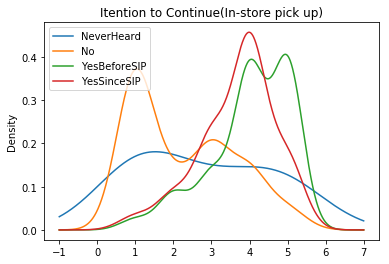

In [114]:
display(sacog['Tried-InStorePickup'].value_counts())
sacog[~sacog['Tried-InStorePickup'].isin(['No Response'])].groupby('Tried-InStorePickup')['DoInStage23-InStorePickup'].plot(kind='density', legend=True, title = "Intention to Continue(In-store pick up)")

No              154
YesSinceSIP     118
YesBeforeSIP     39
NeverHeard       13
No Response       3
Name: Tried-CurbsidePickup, dtype: int64

Tried-CurbsidePickup
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-CurbsidePickup, dtype: object

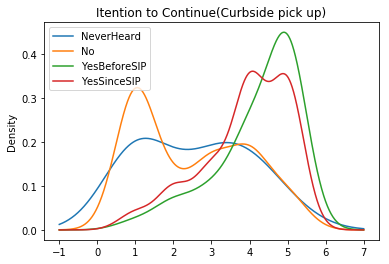

In [112]:
display(sacog['Tried-CurbsidePickup'].value_counts())
sacog[~sacog['Tried-CurbsidePickup'].isin(['No Response'])].groupby('Tried-CurbsidePickup')['DoInStage23-CurbsidePickup'].plot(kind='density', legend=True, title = "Intention to Continue(Curbside pick-up)")

No              188
NeverHeard       93
YesBeforeSIP     27
YesSinceSIP      17
No Response       2
Name: Tried-CrowdSourcedDelivery, dtype: int64

Tried-CrowdSourcedDelivery
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-CrowdSourcedDelivery, dtype: object

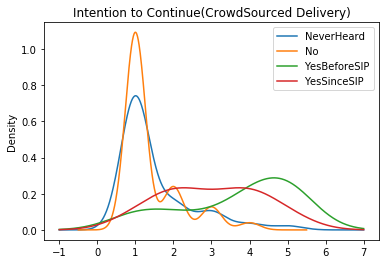

In [128]:
display(sacog['Tried-CrowdSourcedDelivery'].value_counts())
sacog[~sacog['Tried-CrowdSourcedDelivery'].isin(['No Response'])].groupby('Tried-CrowdSourcedDelivery')['DoInStage23-CrowdSourcedDelivery'].plot(kind='density', legend=True, title = "Intention to Continue(CrowdSourced Delivery)")

No              226
YesSinceSIP      43
NeverHeard       36
YesBeforeSIP     19
No Response       3
Name: Tried-ContactlessCurbside, dtype: int64

 1       130
 3        55
 2        51
 5        44
 4        43
-9998      4
Name: DoInStage23-ContactlessCurbside, dtype: int64

Tried-ContactlessCurbside
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-ContactlessCurbside, dtype: object

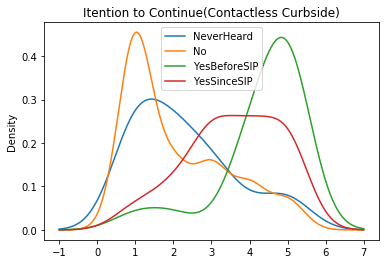

In [110]:
display(sacog['Tried-ContactlessCurbside'].value_counts())
display(sacog['DoInStage23-ContactlessCurbside'].value_counts())
sacog[~((sacog['Tried-ContactlessCurbside'].isin(['No Response'])) | (sacog['DoInStage23-ContactlessCurbside'].isin([-9998])))].groupby('Tried-ContactlessCurbside')['DoInStage23-ContactlessCurbside'].plot(kind='density', legend=True,  title = "Intention to Continue(Contactless Curbside)")

No              115
YesSinceSIP     101
YesBeforeSIP     84
NeverHeard       23
No Response       4
Name: Tried-ContactlessDoor, dtype: int64

 5       103
 1        78
 4        73
 3        50
 2        19
-9998      4
Name: DoInStage23-ContactlessDoor, dtype: int64

Tried-ContactlessDoor
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-ContactlessDoor, dtype: object

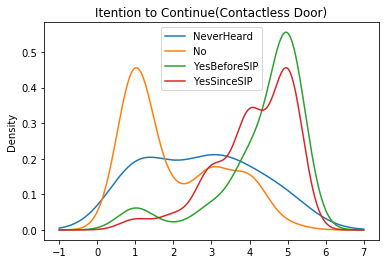

In [108]:
display(sacog['Tried-ContactlessDoor'].value_counts())
display(sacog['DoInStage23-ContactlessDoor'].value_counts())
sacog[~((sacog['Tried-ContactlessDoor'].isin(['No Response'])) | (sacog['DoInStage23-ContactlessDoor'].isin([-9998])))].groupby('Tried-ContactlessDoor')['DoInStage23-ContactlessDoor'].plot(kind='density', legend=True,  title = "Intention to Continue(Contactless Door)")

No              217
YesBeforeSIP     90
YesSinceSIP      10
NeverHeard        7
No Response       3
Name: Tried-LockerPickup, dtype: int64

 1       142
 2        57
 3        56
 4        37
 5        32
-9998      3
Name: DoInStage23-LockerPickup, dtype: int64

Tried-LockerPickup
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-LockerPickup, dtype: object

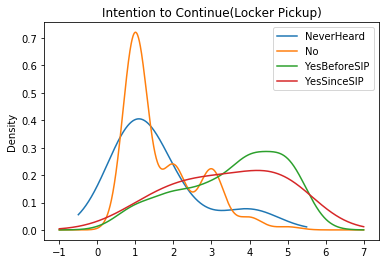

In [117]:
display(sacog['Tried-LockerPickup'].value_counts())
display(sacog['DoInStage23-LockerPickup'].value_counts())
sacog[~((sacog['Tried-LockerPickup'].isin(['No Response'])) | (sacog['DoInStage23-LockerPickup'].isin([-9998])))].groupby('Tried-LockerPickup')['DoInStage23-LockerPickup'].plot(kind='density', legend=True, title = "Intention to Continue(Locker Pickup)")

#### There are not many people tried bundling, contactless driveless or Drone so it's hard to infer from the distribution

No              184
NeverHeard      135
YesSinceSIP       4
YesBeforeSIP      2
No Response       2
Name: Tried-BundlingOnlineGroceries, dtype: int64

 1       240
 2        55
 3        20
 4         7
 5         3
-9998      2
Name: DoInStage23-BundlingOnlineGroceries, dtype: int64

Tried-BundlingOnlineGroceries
NeverHeard      AxesSubplot(0.125,0.125;0.775x0.755)
No              AxesSubplot(0.125,0.125;0.775x0.755)
YesBeforeSIP    AxesSubplot(0.125,0.125;0.775x0.755)
YesSinceSIP     AxesSubplot(0.125,0.125;0.775x0.755)
Name: DoInStage23-BundlingOnlineGroceries, dtype: object

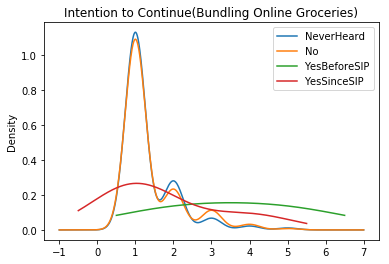

In [120]:
display(sacog['Tried-ContactlessDriverless'].value_counts())
display(sacog['DoInStage23-ContactlessDriverless'].value_counts())
sacog[~((sacog['Tried-ContactlessDriverless'].isin(['No Response'])) | (sacog['DoInStage23-ContactlessDriverless'].isin([-9998])))].groupby('Tried-ContactlessDriverless')['DoInStage23-ContactlessDriverless'].plot(kind='density', legend=True, title = "Intention to Continue(Contactless Driverless)")

display(sacog['Tried-BundlingOnlineGroceries'].value_counts())
display(sacog['DoInStage23-BundlingOnlineGroceries'].value_counts())
sacog[~((sacog['Tried-BundlingOnlineGroceries'].isin(['No Response'])) | (sacog['DoInStage23-BundlingOnlineGroceries'].isin([-9998])))].groupby('Tried-BundlingOnlineGroceries')['DoInStage23-BundlingOnlineGroceries'].plot(kind='density', legend=True, title = "Intention to Continue(Bundling Online Groceries)")